1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline
import warnings; warnings.simplefilter('ignore')

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [146]:
db = pd.read_csv('stud_math.csv')

#### В базе всего 395 строк - это ОЧЕНЬ мало для модели

Увы, строк полностью корректно заполненных в датасете только 97, что составляет менее 25%

In [147]:
db_full = db.dropna()
len(db_full), len(db)

(97, 395)

По этому чситаю, что нужно постараться заполнить пустущие значения, а то модель придется строить на очень ограниченных данных

Проверим целевой параметр - оценку за тест - score

In [148]:
db.score.value_counts().sort_index()

0.0      37
20.0      1
25.0      7
30.0     15
35.0      9
40.0     31
45.0     27
50.0     54
55.0     46
60.0     31
65.0     31
70.0     27
75.0     33
80.0     16
85.0      6
90.0     12
95.0      5
100.0     1
Name: score, dtype: int64

In [149]:
db[(db.score.isnull()) | (db.score == 0)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


<AxesSubplot:xlabel='score', ylabel='Count'>

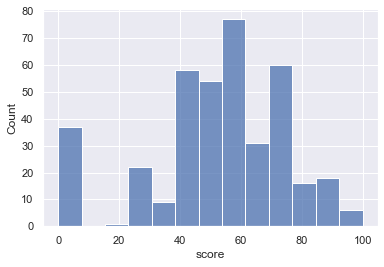

In [150]:
sns.set()
sns.histplot(db['score'])

Гистограмма показывает "нормальное" разспределение в диапазоне от 20 до 100. Список записей с нулем в поле score - не выделяется ничем примечательным...
____________________________
#### К сожалению, выглядит так, что оценки ноль в поле score - это не оценка знаний, а пропущенные данные. То есть использовать эти строки мы не можем, и их нужно исключить


In [151]:
db0 = db[db.score == 0]         # список значений без оценки по тесту 'score'

In [152]:
db = db[db.score > 0]           # исключаем строки с пропущенной или нулевой оценкой за тест 'score'
len(db)                         # осталось 352 записи в базе данных

352

In [153]:
'''функция вывода статистики по столбцам с данными типа  object
c - column - имя столбца для работы
dd - data in def - вспомогательная переменная для работы
'''


def obj_column(c):
    dd = db.loc[:, c]
    
    display(pd.DataFrame(dd.value_counts()))
    print(f"Список значений в поле: {dd.unique()}")
    print(f"В столбце менее 10 раз: {(dd.value_counts() < 10).sum()} значений")
    print(f"В столбце             : {(dd == '').sum()} пустых значений")
    print(f"В столбце             : {(pd.isna(dd)).sum()} значений NaN\n")
    
    pd.DataFrame(dd).info()

In [154]:
obj_column('school')

,school
GP,311
MS,41


Список значений в поле: ['GP' 'MS']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


##### Поле 'school' хорошо заполнено. Нет пропусков или ошибок.
****

In [155]:
obj_column('sex')

,sex
F,182
M,170


Список значений в поле: ['F' 'M']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


##### Поле 'sex' хорошо заполнено. Нет пропусков или ошибок.
****

In [156]:
obj_column('address')

,address
U,265
R,73


Список значений в поле: ['U' nan 'R']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 14 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  338 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [157]:
db[db.address.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0
348,GP,F,17,NaN,GT3,T,4.0,3.0,health,other,reputation,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,NaN,4.0,3.0,4.0,0.0,75.0


In [158]:
db[db.address == 'U'].traveltime.value_counts()

1.0    181
2.0     59
3.0      7
4.0      3
Name: traveltime, dtype: int64

#### К сожалению, 17 записей не содержат сведений об адресе. Я склоенен считать, что когда затруднились ответить, где проживает ученик - значит он не проживает в сельской местности. Скорее всего - он живет в пригороде. так как сремя на дорогу в школу составляет от 0 до 30 минут и ни разу - дольше.
И я бы исправил эти пропуски на 'U'.
***

#### Создадим еще одну переменную address_, где все поля будут заполнены

In [185]:
db['address_'] = db.address.apply(lambda x: 'U' if pd.isna(x) else x)

In [186]:
obj_column('address_')

,address_
U,279
R,73


Список значений в поле: ['U' 'R']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   address_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [187]:
obj_column('famsize')

,famsize
GT3,228
LE3,100


Список значений в поле: [nan 'GT3' 'LE3']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 24 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  328 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [188]:
db[db.famsize.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0,U,mother,yes,no,no
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0,U,mother,no,yes,yes
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0,R,mother,no,yes,no
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0,U,mother,no,yes,no
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0,U,mother,no,no,no
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0,U,mother,yes,no,no
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0,U,mother,no,yes,no
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0,R,mother,no,no,no
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0,R,mother,no,no,yes
167,GP,F,16,U,NaN,T,4.0,2.0,health,services,home,father,1.0,2.0,0.0,no,NaN,yes,no,yes,-6.0,yes,yes,yes,4.0,2.0,3.0,3.0,0.0,80.0,U,father,no,no,yes


#### К сожалению, 24 записи не содержат сведений о размере семьи. Я склоенен считать, что когда затруднились ответить, значит не ясен статус тех, кто живет с семьей или отдельно от семьи. Большинство таких пропусков у записей, где статус проживания стоит "Т" - совместный. 
И я бы исправил эти пропуски на:
* 'GT3' у тех, кто Pstatus='T': ктобы ни был, рас живет соместно - входит в семью и участвует в обучении ребенка.
* 'LE3' у тех, кто Pstatus='A': почему бы они не жили раздельно - отдельный член семьи, не участвует в обучении ребенка
***

In [189]:
obj_column('Pstatus')

,Pstatus
T,277
A,34


Список значений в поле: ['A' nan 'T']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 41 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  311 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [190]:
db[db.Pstatus.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0,U,father,no,yes,no
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0,U,mother,no,yes,yes
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0,U,father,no,yes,no
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0,U,mother,no,yes,no
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0,U,mother,no,yes,yes
28,GP,M,16,U,LE3,NaN,3.0,4.0,services,other,home,mother,1.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,3.0,3.0,5.0,4.0,55.0,U,mother,yes,no,no
54,GP,F,15,U,LE3,NaN,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0,U,mother,no,no,yes
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0,U,mother,yes,yes,yes
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,-12.0,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0,U,mother,yes,yes,yes
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0,U,nobody,yes,no,no


#### К сожалению, это самое плохо заполненное поле в базе данных -  24 записи не содержат сведений о статусе проживания родителей в семье. Я склоенен считать, что эти пропуски - это нежелание признавать неприятную правду: родителеи живут раздельно. Подавляющее большинство таких случаев - проживают в городе, что к, сожалению, согласуется с картиной современных тенденций. 
И я бы исправил эти пропуски на 'A' у тех, кто address='U'
***

In [191]:
obj_column('guardian')

,guardian
mother,225
father,78
other,20


Список значений в поле: ['mother' 'father' 'other' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 29 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  323 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [192]:
db[db.guardian.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_
38,GP,F,15,R,GT3,T,3.0,4.0,services,health,course,NaN,1.0,3.0,0.0,yes,NaN,yes,yes,yes,-9.0,yes,yes,no,4.0,3.0,2.0,5.0,2.0,55.0,R,nobody,yes,no,yes
41,GP,M,15,U,LE3,T,4.0,4.0,teacher,other,home,NaN,1.0,1.0,0.0,no,yes,no,no,no,-3.0,yes,yes,NaN,5.0,4.0,3.0,5.0,8.0,60.0,U,nobody,no,yes,no
49,GP,F,15,U,GT3,T,4.0,4.0,services,teacher,other,NaN,1.0,2.0,1.0,yes,yes,no,yes,no,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,2.0,35.0,U,nobody,yes,yes,no
53,GP,F,15,U,GT3,T,4.0,4.0,services,services,course,NaN,1.0,1.0,0.0,yes,yes,yes,no,yes,-3.0,yes,yes,no,3.0,3.0,4.0,5.0,0.0,55.0,U,nobody,yes,yes,yes
60,GP,F,16,R,GT3,T,4.0,4.0,health,teacher,other,NaN,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,2.0,4.0,4.0,4.0,6.0,55.0,R,nobody,no,yes,no
81,GP,M,15,U,GT3,NaN,2.0,3.0,other,other,home,NaN,1.0,3.0,0.0,yes,no,NaN,NaN,no,-9.0,yes,yes,no,5.0,3.0,2.0,5.0,4.0,55.0,U,nobody,yes,no,no
90,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,4.0,0.0,40.0,U,nobody,no,yes,yes
98,GP,F,16,U,GT3,T,4.0,4.0,other,other,reputation,NaN,1.0,1.0,0.0,no,NaN,no,yes,no,-3.0,yes,NaN,no,5.0,3.0,4.0,1.0,6.0,70.0,U,nobody,no,no,no
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0,U,nobody,no,no,no
164,GP,M,17,R,LE3,T,1.0,1.0,other,services,course,NaN,4.0,2.0,3.0,no,no,NaN,yes,yes,-6.0,no,no,yes,5.0,3.0,5.0,NaN,0.0,35.0,R,nobody,no,no,no


#### Поле 'guardian' имеет три варианта ответа, что очень мало для информации. Но если не заполнено значением 'other', то я бы заполнил эти пропуски значеним 'nobody'. Довод том, что подавляющее большинство таких семей живут совместно и они больше чем три человека - очень вероятно, что родители не опекают учебу студента, они заняты другими детьми.
Хотя, до конца не ясно, что значить "опекун" в данном контексте


#### Создадим новую переменную guardian_, где заполню все пропуски в оригинальном столбце значением 'nobody'и посмотрим, что получится с корреляцией

In [193]:
db['guardian_'] = db.guardian.apply(lambda x: 'nobody' if pd.isna(x) else x)

In [194]:
obj_column('guardian_')

,guardian_
mother,225
father,78
nobody,29
other,20


Список значений в поле: ['mother' 'father' 'other' 'nobody']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   guardian_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [195]:
obj_column('reason')

,reason
course,119
reputation,96
home,89
other,33


Список значений в поле: ['course' 'other' 'home' 'reputation' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 15 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  337 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [196]:
db[db.reason.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_
33,GP,M,15,U,LE3,T,3.0,3.0,other,other,NaN,mother,1.0,2.0,0.0,no,NaN,no,yes,no,-6.0,yes,yes,no,5.0,3.0,2.0,2.0,0.0,60.0,U,mother,no,no,no
63,GP,F,16,U,GT3,NaN,4.0,3.0,teacher,health,NaN,mother,1.0,3.0,0.0,yes,yes,yes,yes,yes,-9.0,yes,yes,no,3.0,4.0,4.0,4.0,2.0,45.0,U,mother,yes,yes,yes
73,GP,M,16,U,GT3,T,3.0,1.0,other,other,NaN,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,no,no,NaN,3.0,2.0,5.0,2.0,70.0,U,mother,no,no,no
77,GP,F,16,U,GT3,T,2.0,2.0,other,other,NaN,mother,1.0,4.0,0.0,no,no,yes,no,yes,-12.0,yes,yes,yes,5.0,2.0,3.0,3.0,0.0,55.0,U,mother,no,no,yes
112,GP,F,16,U,GT3,NaN,2.0,2.0,at_home,other,NaN,mother,NaN,NaN,1.0,yes,no,no,yes,yes,NaN,yes,yes,NaN,3.0,1.0,2.0,5.0,6.0,65.0,U,mother,yes,no,no
138,GP,M,16,U,LE3,T,1.0,1.0,services,other,NaN,NaN,1.0,2.0,1.0,no,no,no,no,yes,-6.0,yes,no,yes,4.0,4.0,4.0,5.0,0.0,60.0,U,nobody,no,no,no
185,GP,M,17,U,GT3,T,3.0,3.0,services,services,NaN,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,NaN,yes,4.0,3.0,4.0,4.0,12.0,55.0,U,mother,no,yes,no
186,GP,M,16,U,GT3,NaN,1.0,2.0,services,services,NaN,mother,1.0,1.0,0.0,no,yes,yes,yes,yes,-3.0,yes,yes,yes,3.0,3.0,3.0,3.0,2.0,55.0,U,mother,no,yes,yes
196,GP,M,17,U,GT3,T,4.0,4.0,services,teacher,NaN,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,yes,no,5.0,2.0,3.0,5.0,4.0,80.0,U,mother,no,no,no
263,GP,F,17,U,GT3,T,3.0,3.0,other,other,NaN,mother,1.0,3.0,0.0,no,no,NaN,yes,no,-9.0,yes,no,no,3.0,2.0,3.0,4.0,4.0,45.0,U,mother,no,no,no


#### Поле 'reason' имеет четыре варианта ответа и 15 случаев пропусков. Подавляющее большинство пропусков у тех, кто живет в городе и рядом со школой, но не использует дополнительные школьные занятия, как и платные и даже домашние. Также эти люди почти все посещали детский садик.
Я думаю, что пропуски у таких студентов (городские, посещавщие детский сад, менее 15 минут до школы, не использование школьных занятий) нужно заменить на 'home', потому что они просто в своей жизни ходят туда, где живут что называется "по-накатанной", и не выделяют каких-либо критериев выбора школы.


In [197]:
obj_column('schoolsup')

,schoolsup
no,295
yes,48


Список значений в поле: ['yes' 'no' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 9 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  343 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [198]:
db[db.schoolsup.isna()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_
27,GP,M,15,U,GT3,T,4.0,2.0,health,services,other,mother,1.0,1.0,0.0,NaN,no,yes,no,yes,-3.0,yes,yes,NaN,2.0,2.0,4.0,1.0,4.0,75.0,U,mother,no,no,yes
35,GP,F,15,U,GT3,T,2.0,3.0,other,other,other,father,NaN,1.0,0.0,NaN,yes,no,yes,yes,-3.0,yes,no,no,3.0,5.0,1.0,5.0,0.0,30.0,U,father,no,yes,no
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0,U,mother,no,yes,no
151,GP,M,16,U,LE3,T,2.0,1.0,at_home,NaN,course,mother,1.0,1.0,1.0,NaN,no,no,yes,yes,-3.0,yes,no,yes,4.0,4.0,4.0,5.0,6.0,70.0,U,mother,no,no,no
211,GP,M,17,U,LE3,T,4.0,4.0,services,other,home,mother,1.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,5.0,3.0,5.0,3.0,13.0,65.0,U,mother,no,yes,yes
274,GP,F,17,U,GT3,T,2.0,4.0,at_home,health,reputation,mother,2.0,2.0,0.0,NaN,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,3.0,3.0,1.0,2.0,50.0,U,mother,no,yes,yes
321,GP,F,17,U,GT3,T,2.0,2.0,other,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,no,yes,4.0,2.0,2.0,3.0,12.0,45.0,U,mother,no,yes,no
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0,R,nobody,no,no,no
394,MS,M,19,U,LE3,T,1.0,1.0,other,at_home,NaN,father,1.0,1.0,0.0,NaN,no,no,no,yes,-3.0,yes,yes,no,3.0,2.0,3.0,5.0,5.0,45.0,U,father,no,no,no


#### Пропусков в поле 'schoolsup' очень не много. 
И на мой взгляд, если отчечающий на этот вопрос, затруднился с ответом, то это обоснованное предложение заменить пропуски 
значением 'no'.
****

In [199]:
db['schoolsup_'] = db.schoolsup.apply(lambda x: 'no' if pd.isna(x) else x)

In [200]:
obj_column('schoolsup_')

,schoolsup_
no,304
yes,48


Список значений в поле: ['yes' 'no']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   schoolsup_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [201]:
obj_column('famsup')

,famsup
yes,196
no,120


Список значений в поле: ['no' 'yes' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 36 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  316 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [203]:
db['famsup_'] = db.famsup.apply(lambda x: 'no' if pd.isna(x) else x)

In [204]:
obj_column('famsup_')

,famsup_
yes,196
no,156


Список значений в поле: ['no' 'yes']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsup_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [205]:
obj_column('paid')

,paid
no,170
yes,146


Список значений в поле: ['no' nan 'yes']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 36 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    316 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


#### Пропусков в поле 'paid', также много. 
И тут тоже надо бы заменить пропуски значением 'no'.
****

In [206]:
db['paid_'] = db.paid.apply(lambda x: 'no' if pd.isna(x) else x)

In [207]:
obj_column('paid_')

,paid_
no,206
yes,146


Список значений в поле: ['no' 'yes']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid_   352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [208]:
obj_column('activities')

,activities
yes,172
no,168


Список значений в поле: ['no' 'yes' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 12 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  340 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


#### Пропусков в поле 'activities', очень много. 
Наверное и тут надо бы заменить пропуски значением 'no'.
****

In [209]:
db['activities_'] = db.activities.apply(lambda x: 'no' if pd.isna(x) else x)

In [210]:
obj_column('activities_')

,activities_
no,180
yes,172


Список значений в поле: ['no' 'yes']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   activities_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [211]:
obj_column('nursery')

,nursery
yes,272
no,68


Список значений в поле: ['yes' 'no' nan]
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 12 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  340 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [212]:
db[db.nursery.isna()][['school', 'address', 'famsize', 'Pstatus']]

,school,address,famsize,Pstatus
22,GP,U,LE3,T
32,GP,R,NaN,T
85,GP,U,GT3,T
88,GP,U,GT3,T
152,GP,R,GT3,T
212,GP,U,GT3,A
249,GP,U,GT3,T
300,GP,U,LE3,A
336,GP,R,GT3,A
340,GP,U,GT3,T


#### Пропусков в поле 'nursery', очень мало. 
Наверное и тут надо бы заменить пропуски значением 'no'. Ведь если затруднился с ответом - значит и не ходил...
****

In [213]:
obj_column('higher')

,higher
yes,320
no,13


Список значений в поле: ['yes' nan 'no']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 19 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  333 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


#### Пропусков в поле 'higher', не много. 
Как и выше - заменить пропуски значением 'no'. Ведь если затруднился с ответом - значит и не хочешь...
****

In [214]:
db['higher_'] = db.higher.apply(lambda x: 'no' if pd.isna(x) else x)

In [215]:
obj_column('higher_')

,higher_
yes,320
no,32


Список значений в поле: ['yes' 'no']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 0 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   higher_  352 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [216]:
obj_column('internet')

,internet
yes,274
no,49


Список значений в поле: [nan 'yes' 'no']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 29 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  323 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


#### Пропусков в поле 'internet', не много. 
Как и выше - заменить пропуски значением 'no'. Ведь если затруднился с ответом - значит и нету...
****

In [217]:
obj_column('romantic')

,romantic
no,219
yes,104


Список значений в поле: ['no' nan 'yes']
В столбце менее 10 раз: 0 значений
В столбце             : 0 пустых значений
В столбце             : 29 значений NaN

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  323 non-null    object
dtypes: object(1)
memory usage: 5.5+ KB


In [218]:
db[db.romantic.isna()][['sex', 'age', 'address', 'famsize']]

,sex,age,address,famsize
2,F,15,U,LE3
13,M,15,U,GT3
26,M,15,U,GT3
27,M,15,U,GT3
41,M,15,U,LE3
51,F,15,U,LE3
54,F,15,U,LE3
67,F,16,U,GT3
75,M,15,NaN,GT3
112,F,16,U,GT3


In [219]:
db[db.romantic.isna()].age.value_counts()

15    11
16     6
17     6
18     5
19     1
Name: age, dtype: int64

#### Пропусков в поле 'romance', много. И анализ причин пропусков не однозначный. Скорее всего, молодые люди 15-16 лет всеже уже испытывают романтические увлчения, но признать это прямо не могут.
Так что, в случае возраста 15-16 лет городским подросткам, вместо пропусков нужно поставить 'yes'.
****

In [220]:
db.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score', 'address_',
       'guardian_', 'schoolsup_', 'famsup_', 'paid_', 'activities_',
       'higher_'],
      dtype='object')

Практически все переменные, а именно ('school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health') являются номинативными. 

Хотя многие из них ('Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health') содеражт не текст, а цифровые занчения, количество их ограничено 3-5 значениями от нуля или единицы (не считая пропуски), и по сути - это коды, соответствующие определнному смысловому значению.

Проведенный анализ полей с цифровыми значениями показал, что там есть очевидные ошибки. Это не выбросы, так как поля - не числовые по сути. С другой стороны, не хотелось бы "просто" исключить их из анализа. Тем более, что ошибки похожи на описки (-1 и 40). Ну и не плохо было бы определиться с пропусками.

In [221]:
nom_array = dict()                                    # создадим словарь для каждого столбца со списком числовых занчений 
col = ['Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'health']  # список столбцов для проверки и исправления ошибок
for q in col:                                         # заполнение словаря списком значений в поле
    data = db.loc[:, q]
    nom_array[q] = list(data.unique())
nom_array


{'Medu': [4.0, 1.0, 3.0, 2.0, nan, 0.0],
 'Fedu': [4.0, 1.0, 2.0, 3.0, 40.0, nan, 0.0],
 'traveltime': [2.0, 1.0, 3.0, nan, 4.0],
 'studytime': [2.0, 3.0, 1.0, nan, 4.0],
 'failures': [0.0, 3.0, nan, 2.0, 1.0],
 'famrel': [4.0, 5.0, 3.0, nan, -1.0, 2.0, 1.0],
 'freetime': [3.0, 2.0, 4.0, 1.0, 5.0, nan],
 'goout': [4.0, 3.0, 2.0, 1.0, 5.0, nan],
 'health': [3.0, 5.0, 1.0, 2.0, 4.0, nan]}

#### Напишем код для исправления очевидных ошибок в номинативных переменных 
(в виде отрицательных значений или значений кратных 10). 

Код сделаем универсальным для возможного дальнейшего применения в будущем, в случае получения новых порций данных. Проверки-исправаления:
* если занчение между 0 и 5 (крайние границы для всех переменных) - оставить как есть
* если значение кратно 10 (случайно пропущена десятичный знак) и после деления на 10 оказывается в списке значений этого конкретного поля - то разделить значение на 10
* если значение отрицательное (случайно поставлен знак минуса) и модуль значения в списке значений этого конкретного поля - то инвертировать значение
* в любом другом случае - присвоить занчене "None". Сюда попадают и случаи вроде 80, или -15. 

In [222]:
for column in col:
    db.loc[:, (column)] = db.loc[:, (column)].apply(lambda x: x if 0 <= x <= 5
                   else x/10 if x/10 in nom_array[column]
                   else 0-x if 0-x in nom_array[column]
                   else None)

In [223]:
db.absences.value_counts().sort_index()

0.0      74
1.0       3
2.0      60
3.0       7
4.0      52
5.0       5
6.0      30
7.0       6
8.0      20
9.0       3
10.0     17
11.0      2
12.0     12
13.0      2
14.0     12
15.0      2
16.0      7
17.0      1
18.0      5
19.0      1
20.0      4
21.0      1
22.0      3
23.0      1
24.0      1
25.0      1
26.0      1
28.0      1
30.0      1
38.0      1
40.0      1
54.0      1
56.0      1
75.0      1
212.0     1
385.0     1
Name: absences, dtype: int64

Есть большой соблазн провести очистку через определение выбросов. Однако, простое применение статистического принципа уберет слишком много значений, которые вполне укладываются в здравый смысл

In [224]:
IQR = db.absences.quantile(0.75) - db.absences.quantile(0.25)
perc25 = db.absences.quantile(0.25)
perc75 = db.absences.quantile(0.75)
 
print(f'25-й перцентиль: {perc25} \n75-й перцентиль: {perc75} \nIQR: {IQR},') 
print(f"Границы выбросов: [{perc25 - 1.5*IQR}, {perc25 + 1.5*IQR}].")

25-й перцентиль: 2.0 
75-й перцентиль: 8.0 
IQR: 6.0,
Границы выбросов: [-7.0, 11.0].


В то же время, в этом поле есть много данных, также вызывающих вопросы. Могу предположить, что многие не поняли смысла вопроса, и указали количество часов, а не занятий. Занятия же состоят из двух чаcов. И поэтому, значений четных, вплоть до 14 существенно больше нечетных.

<AxesSubplot:xlabel='absences', ylabel='Count'>

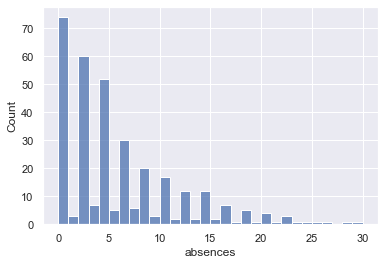

In [225]:
sns.histplot(db.absences, stat = 'count', binwidth=1, binrange=[0,30])

In [226]:
db[db.absences >= 50]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score,address_,guardian_,schoolsup_,famsup_,paid_,activities_,higher_
74,GP,F,16,U,GT3,T,3.0,3.0,other,services,home,mother,1.0,2.0,0.0,yes,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,NaN,3.0,5.0,54.0,55.0,U,mother,yes,yes,yes,yes,yes
183,GP,F,17,U,LE3,NaN,3.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,yes,yes,5.0,3.0,3.0,1.0,56.0,40.0,U,mother,no,yes,no,yes,yes
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,NaN,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0,U,mother,yes,no,no,no,yes
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,-6.0,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0,R,mother,no,no,no,no,no
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0,U,nobody,no,yes,yes,no,yes


Единственное, что можно почти уверенно заявить, это то, что absences=385 выглядит ошибкой свмещения данных из соседних полей: следующее поле 'score'=85 у этой записи. Есть предположение, что реально это поле должно содержать 3. Или ноль. 

Остальные записи с большим количеством пропущенных занятий -  выглядят достоверно, так как их результаты теста достаточно низкие.

In [227]:
db['absences_'] = db.absences.apply(lambda x: None if x > 300 else x)

Самое стрнное поле ('studytime, granular'), так как не ясны ни его смысл, ни значения, внесенные в него.

In [228]:
db.loc[:, 'studytime, granular'].unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

Пожалуй, единственное, что можно про него сказать, что чстотное распределение значений похоже на "нормальное".

In [229]:
db.loc[:, ('studytime, granular')].value_counts().sort_index()

-12.0     24
-9.0      58
-6.0     173
-3.0      90
Name: studytime, granular, dtype: int64

<AxesSubplot:xlabel='studytime, granular', ylabel='Count'>

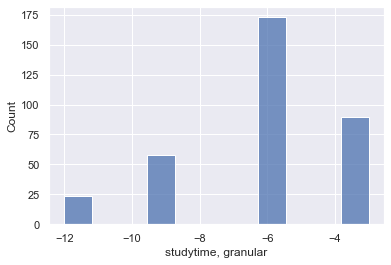

In [230]:
sns.histplot(db.loc[:, ('studytime, granular')])

# Анализ корреляции количественных переменных

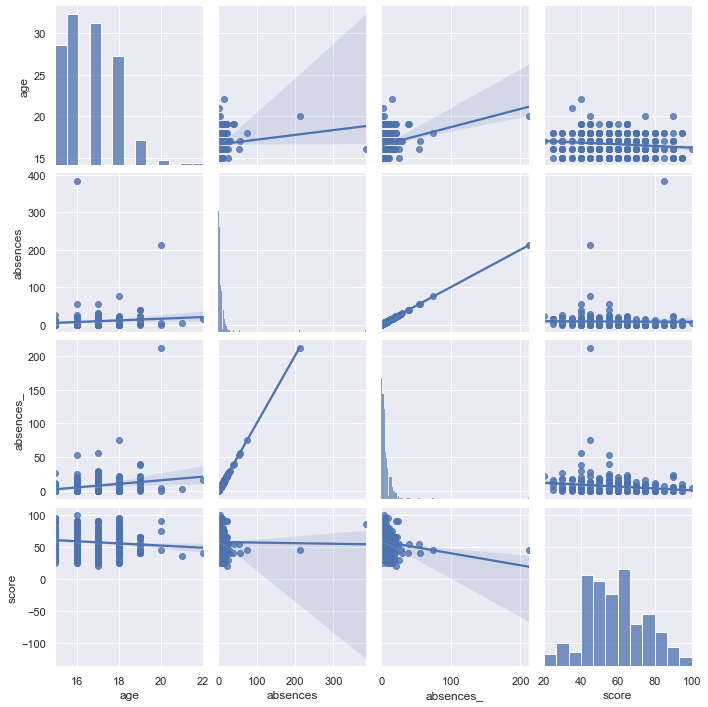

In [231]:
# sns.pairplot(cacao, kind = 'reg')
db_corr = db.loc[:,['age', 'absences', 'absences_','score']]
sns.pairplot(db_corr, kind = 'reg')

In [232]:
db_corr.corr()

,age,absences,absences_,score
age,1.000000,0.112599,0.240747,-0.131542
absences,0.112599,1.000000,1.000000,-0.014039
absences_,0.240747,1.000000,1.000000,-0.162176
score,-0.131542,-0.014039,-0.162176,1.000000


#### Итак, среди числовых переменных есть реально числовые и их корреляция довольно слабая. Самый большой коэффициент корредляции с результатом теста у переменной возраст "age" (-0.131542) и исправленный "absences" (-0.162176).

Номинативные переменные, представленные числовыми кодами значений стоило тоже проверить на корреляцию, так как индекс их отражает возрастание признака, то етсь определнную векторную направленность, с которой можно сравнить итоговый результат.

In [233]:
col_corr = ['Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'studytime, granular', 'freetime', 'goout', 'health', 'score']
db.loc[:,col_corr].corr()

,Medu,Fedu,traveltime,studytime,failures,famrel,"studytime, granular",freetime,goout,health,score
Medu,1.000000,0.606270,-0.165394,0.070533,-0.205944,-0.006133,-0.070533,0.021002,0.080556,-0.038050,0.186477
Fedu,0.606270,1.000000,-0.145471,-0.010779,-0.268901,-0.016694,0.010779,-0.030449,0.044127,0.018671,0.135268
traveltime,-0.165394,-0.145471,1.000000,-0.101490,0.091757,-0.029299,0.101490,-0.023067,0.029374,-0.000092,-0.075516
studytime,0.070533,-0.010779,-0.101490,1.000000,-0.156406,0.057143,-1.000000,-0.128661,-0.029686,-0.085469,0.142055
failures,-0.205944,-0.268901,0.091757,-0.156406,1.000000,0.006870,0.156406,0.127391,0.126770,0.064083,-0.289377
famrel,-0.006133,-0.016694,-0.029299,0.057143,0.006870,1.000000,-0.057143,0.158597,0.045341,0.107055,0.040590
"studytime, granular",-0.070533,0.010779,0.101490,-1.000000,0.156406,-0.057143,1.000000,0.128661,0.029686,0.085469,-0.142055
freetime,0.021002,-0.030449,-0.023067,-0.128661,0.127391,0.158597,0.128661,1.000000,0.296392,0.072729,-0.012457
goout,0.080556,0.044127,0.029374,-0.029686,0.126770,0.045341,0.029686,0.296392,1.000000,-0.010343,-0.182286
health,-0.038050,0.018671,-0.000092,-0.085469,0.064083,0.107055,0.085469,0.072729,-0.010343,1.000000,-0.075340


К сожалению, и тут не удается найти сколько-нибудь сильную корреляцию. Наибольшие результаты у:
*  'failures' (-0.289377)
*      'Medu' (0.186477)
*     'goout' (-0.182286)
* 'studytime' (0.142055)
*      'Fedu' (0.135268)

Коэффициент корреляции помог понять, что солбец "studytime, granular" является производным от "studytime", коэффициент корреляции у них - равен 1. и он получается простым умножением на -3.

In [234]:
db_study=db.copy()
db_study.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score', 'address_',
       'guardian_', 'schoolsup_', 'famsup_', 'paid_', 'activities_', 'higher_',
       'absences_']

db_study['divided'] = db_study['granular'] / db_study['studytime'] 
db_study.divided.unique()

array([-3., nan])

# Анализ номинативных переменных

In [235]:
db.columns
nom_col = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nom_col_corr = ['address_', 'guardian_', 'schoolsup_', 'famsup_', 'paid_', 'activities_', 'higher_']

In [236]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=db.loc[db.loc[:, column].isin(db.loc[:, column].value_counts().index)],
               ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

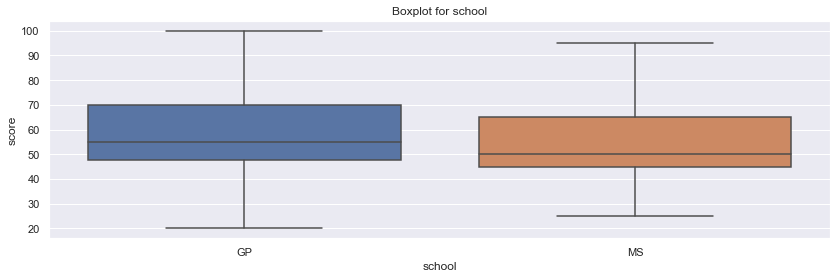

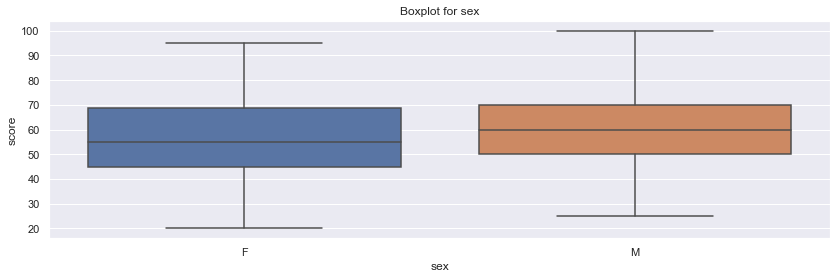

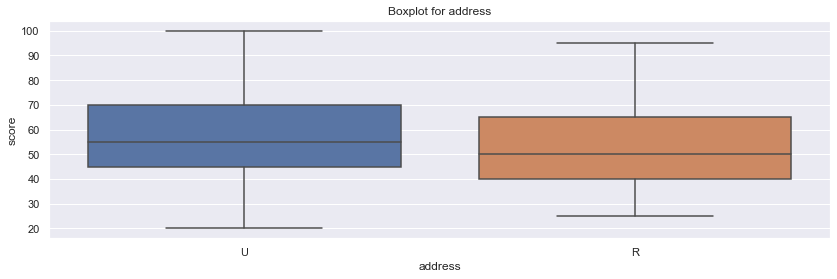

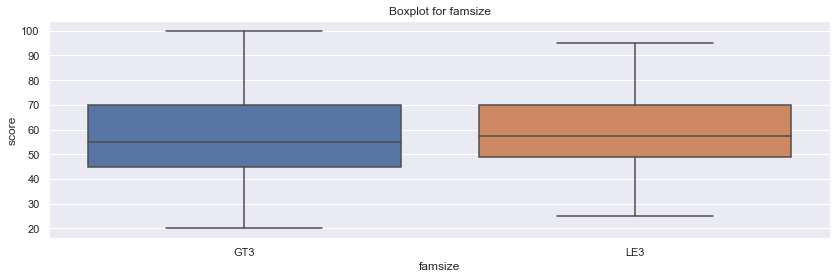

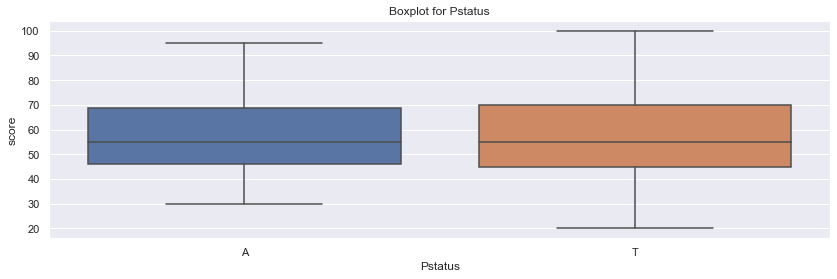

In [237]:
for col in nom_col[:5]:
    get_boxplot(col)

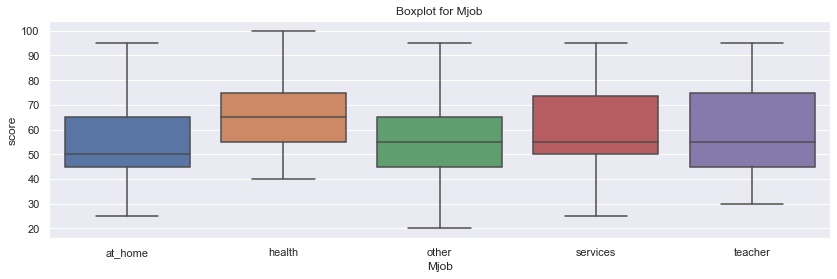

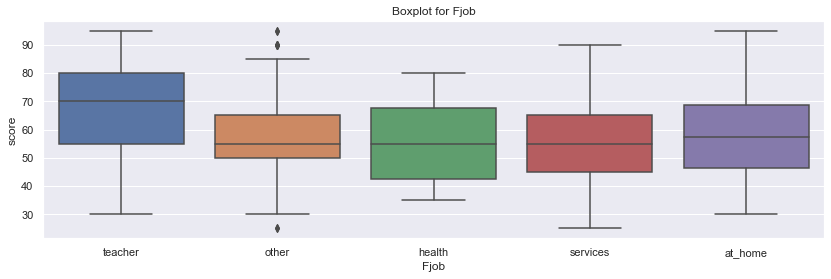

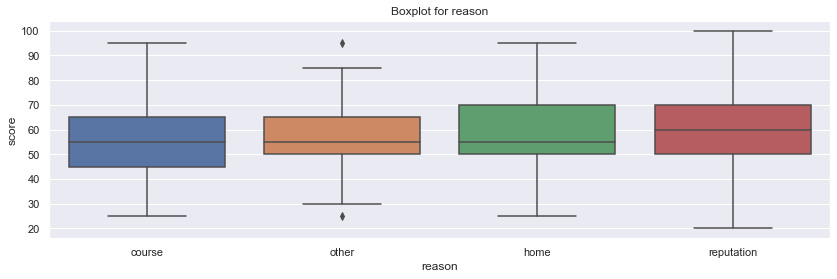

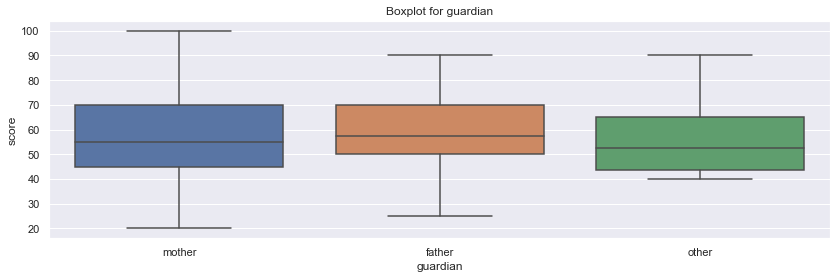

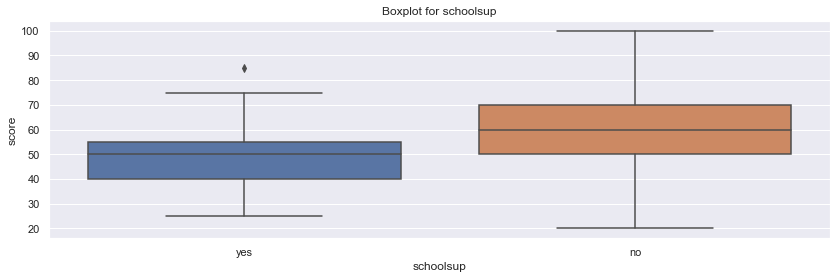

In [238]:
for col in nom_col[5:10]:
    get_boxplot(col)

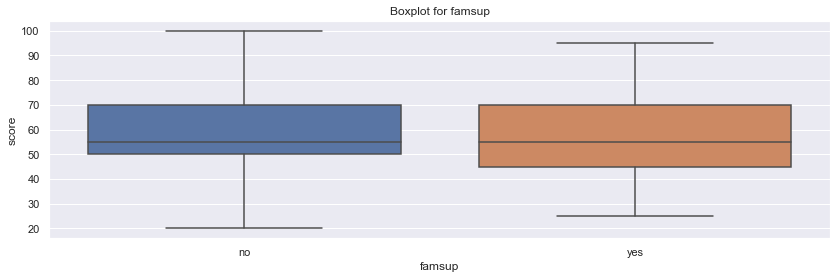

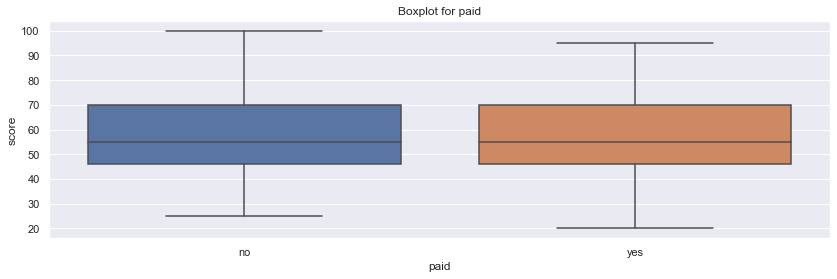

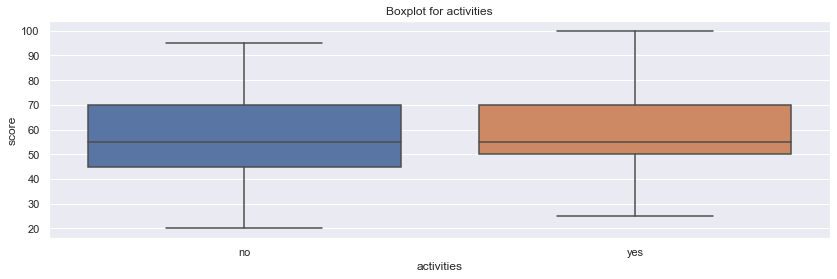

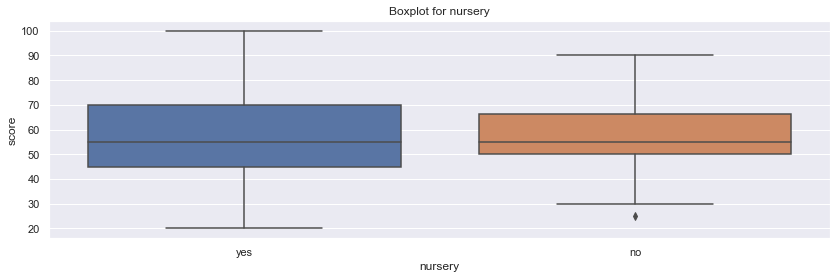

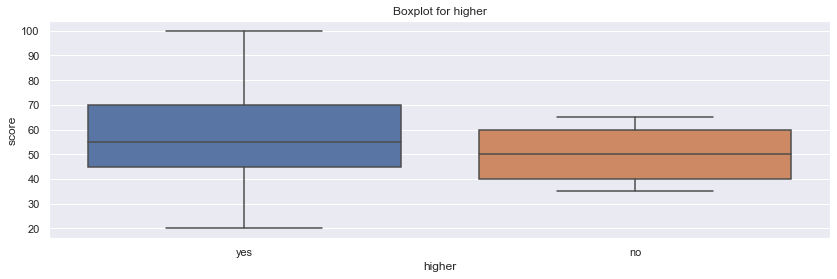

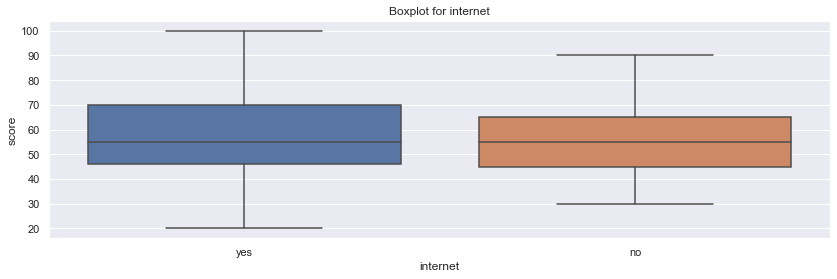

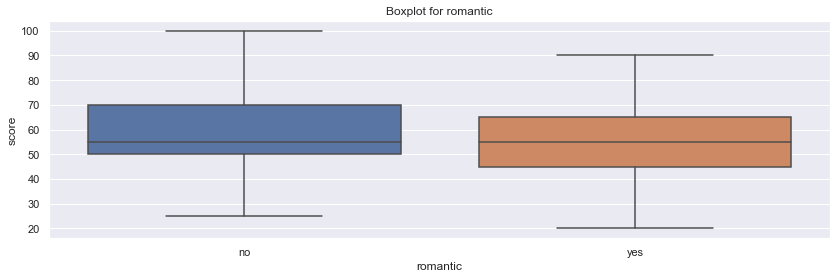

In [239]:
for col in nom_col[10:]:
    get_boxplot(col)

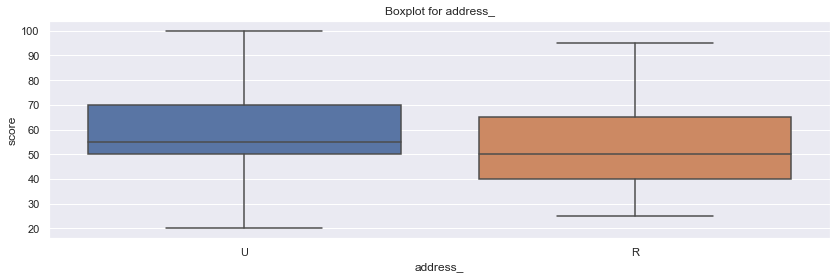

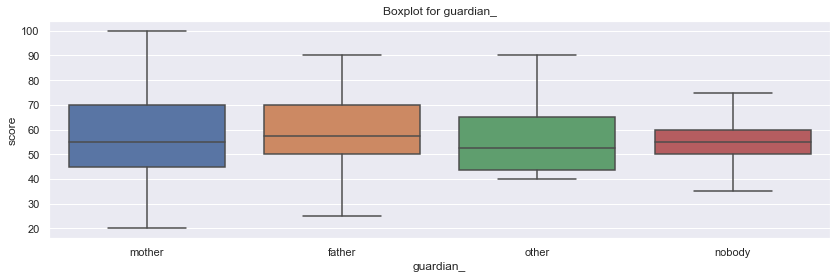

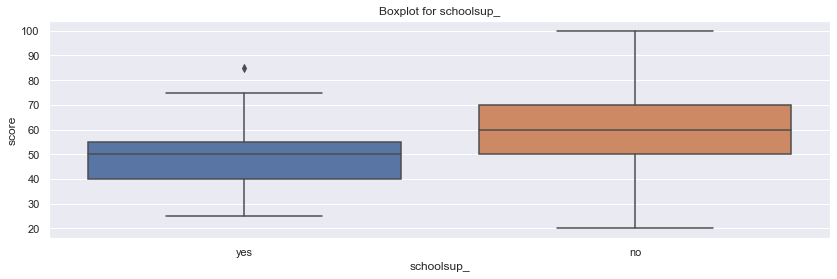

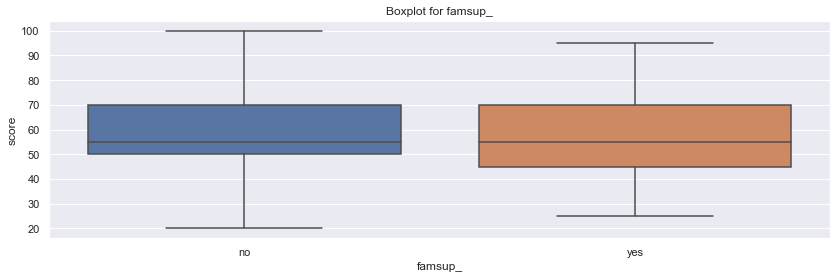

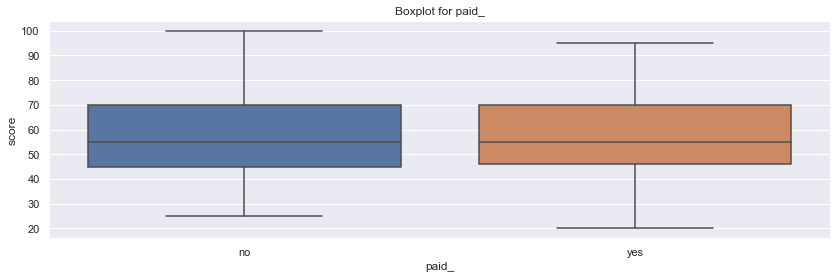

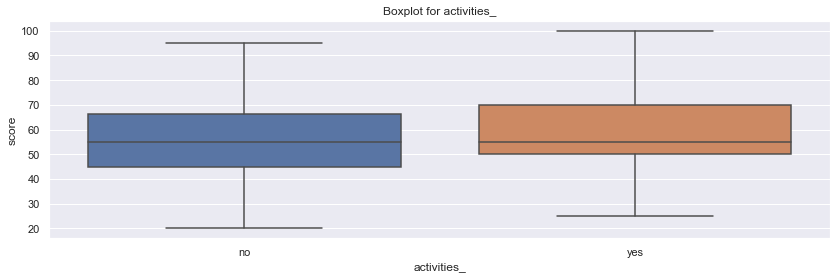

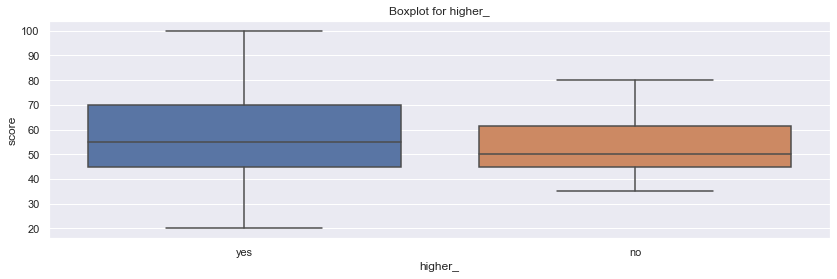

In [240]:
for col in nom_col_corr:
    get_boxplot(col)

In [242]:
def get_stat_dif(column):
    cols = db.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(db.loc[db.loc[:, column] == comb[0], 'score'], 
                        db.loc[db.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.06/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [243]:
for col in nom_col:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


In [244]:
for col in nom_col_corr:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address_
Найдены статистически значимые различия для колонки schoolsup_


# Итоговый датасет для построения модели

In [245]:
model_list = ['age', 'sex', 'address_', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'failures', 'goout', 'studytime', 'higher_',
              'schoolsup_', 'absences_', 'score']

db_model = db.loc[:, model_list]
db_model.head()

,age,sex,address_,Medu,Fedu,Mjob,Fjob,failures,goout,studytime,higher_,schoolsup_,absences_,score
0,18,F,U,4.0,4.0,at_home,teacher,0.0,4.0,2.0,yes,yes,6.0,30.0
1,17,F,U,1.0,1.0,at_home,other,0.0,3.0,2.0,yes,no,4.0,30.0
2,15,F,U,1.0,1.0,at_home,other,3.0,2.0,2.0,yes,yes,10.0,50.0
3,15,F,U,4.0,2.0,health,NaN,0.0,2.0,3.0,yes,no,2.0,75.0
4,16,F,U,3.0,3.0,other,other,0.0,2.0,2.0,yes,no,4.0,50.0


### Выводы
Для итогового датасета я решил выбрать переменные с корреляцией более 10% и прошедшие тест Стюдента, с учетом некоторых оговорок.

Из чисто числовых переменных я оставил все ('age', 'abscences'), с учетом исправления одного результата, скорее всего, ошибочного: 385 часов пропусков, учитывая высокий балл по тесту - 85. Таким образом, корреляция числовых переменных составила более 10%. 

Из числа количественных, хотя и номинативных переменных, представленных в виде числового признака, корреляция также не высокая, но находится у бОльшого числа переменных. Но и тут я применю порог в 10% и добавлю переменные 'Fedu', 'Medu', 'failures', 'goout', 'studytime'.

Из чисто номинативных переменных, я выбрал переменные с исправленными пропусками 'address_', 'schoolsup_', так как они также прошли тест Стьюдента, а отсутствие пропусков хорошо скажется на результатах моделирования. Также я добавил столбец 'higher_' вместо оригинального, несмотря на то, что тест Стьюдента исправленный столбец не прошел, так как у него есть преймущество отсутствия пропусков. Ну и как есть добавил столбцы 'Mjob', 'Fjob' и 'sex'.

В качестве кандидата на включение в датасет для модели можно оставить еще traveltime с корреляцией больше 7%. 